In [3]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env
import acquire
import prepare

## Summary Explanation

This Notebook seeks to answer question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

I looked at Programs 1, 2, 3 and seperately and did not look at Program 4 due to the small amount of data available. 

Programs 2 and 3 did not have any qualifying scenarios to report.

There are 2 charts to show where Program 1 has something that seems to answer Question 2.

In [2]:
df = acquire.get_data()

In [172]:
df.head()

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java


In [6]:
df = prepare.prep_data(df)

In [7]:
df.head()

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java


In [8]:
df[df.program_id.isna()]

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,


In [9]:
df.shape

(847329, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 847329 entries, 2018-01-26 to 2021-04-21
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         847329 non-null  datetime64[ns]
 1   time         847329 non-null  object        
 2   ip           847329 non-null  object        
 3   path         847329 non-null  object        
 4   user_id      847329 non-null  int64         
 5   cohort_id    847329 non-null  float64       
 6   cohort_name  847329 non-null  object        
 7   slack        847329 non-null  object        
 8   start_date   847329 non-null  object        
 9   end_date     847329 non-null  object        
 10  program_id   847329 non-null  int64         
 11  program      847329 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 84.0+ MB


In [12]:
# How many programs are in this DF
df.program_id.value_counts()

2    713365
3    103411
1     30548
4         5
Name: program_id, dtype: int64

There appears to be very little data for program 4. I will not evauate that program.

# Question 2. 
## Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

### Program 1(Full stack PHP)

In [13]:
# create a variable which contains data only for program 1
program_1 = df[df['program_id'] == 1.0]

In [277]:
program_1.head()

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,10:14:47,97.105.19.61,/,11,1.0,Arches,#arches,2014-02-04,2014-04-22,1,Full Stack PHP


In [16]:
# Which cohorts are in program 1?
program_1.cohort_id.value_counts()

14.0    9587
1.0     8890
17.0    4954
13.0    2845
8.0     1712
19.0    1237
7.0      598
12.0     302
11.0     253
2.0       93
6.0       72
4.0        4
5.0        1
Name: cohort_id, dtype: int64

In [28]:
# This function takes in two lists and compares them. 
# If one of the items in the first list is in the second list, it will print it.
# If there are no matches it will print 'no match'
def match_finder(x, y):
    for i in x:
        if i in y:
            print(i)
    else:
        print('no match')

In [49]:
# Creates the most and least viewed paths for each cohort in program 1. 

# cohort 14
cohort_14_most = list(program_1[program_1['cohort_id'] == 14.0].path.value_counts().index[0:10])
cohort_14_least = list(program_1[program_1['cohort_id'] == 14.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 1
cohort_1_most = list(program_1[program_1['cohort_id'] == 1.0].path.value_counts().index[0:10])
cohort_1_least = list(program_1[program_1['cohort_id'] == 1.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 17
cohort_17_most = list(program_1[program_1['cohort_id'] == 17.0].path.value_counts().index[0:10])
cohort_17_least = list(program_1[program_1['cohort_id'] == 17.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 13
cohort_13_most = list(program_1[program_1['cohort_id'] == 13.0].path.value_counts().index[0:10])
cohort_13_least = list(program_1[program_1['cohort_id'] == 13.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 8
cohort_8_most = list(program_1[program_1['cohort_id'] == 18.0].path.value_counts().index[0:10])
cohort_8_least = list(program_1[program_1['cohort_id'] == 18.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 19
cohort_19_most = list(program_1[program_1['cohort_id'] == 19.0].path.value_counts().index[0:10])
cohort_19_least = list(program_1[program_1['cohort_id'] == 19.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 7
cohort_7_most = list(program_1[program_1['cohort_id'] == 7.0].path.value_counts().index[0:10])
cohort_7_least = list(program_1[program_1['cohort_id'] == 7.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 12
cohort_12_most = list(program_1[program_1['cohort_id'] == 12.0].path.value_counts().index[0:10])
cohort_12_least = list(program_1[program_1['cohort_id'] == 12.0].path.value_counts().loc[lambda x: x <=5].index)

# cohort 11
cohort_11_most = list(program_1[program_1['cohort_id'] == 11.0].path.value_counts().index[0:10])
cohort_11_least = list(program_1[program_1['cohort_id'] == 11.0].path.value_counts().loc[lambda x: x <=5].index)

COHORT 14 comparison

In [54]:
match_finder(cohort_14_most, cohort_1_least)

index.html
no match


In [51]:
match_finder(cohort_14_most, cohort_17_least)

spring/fundamentals/repositories
no match


In [52]:
match_finder(cohort_14_most, cohort_13_least)

spring
appendix
no match


In [55]:
match_finder(cohort_14_most, cohort_13_least)

spring
appendix
no match


In [56]:
match_finder(cohort_14_most, cohort_8_least)

no match


In [57]:
match_finder(cohort_14_most, cohort_19_least)

java-iii
no match


In [58]:
match_finder(cohort_14_most, cohort_7_least)

spring
appendix
no match


In [59]:
match_finder(cohort_14_most, cohort_12_least)

javascript-i
java-iii
html-css
java-ii
java-i
no match


In [60]:
match_finder(cohort_14_most, cohort_11_least)

java-iii
spring
appendix
java-ii
java-i
no match


In [48]:
program_1[program_1['cohort_id'] == 14.0].path.value_counts().head(10)

index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
/                                   125
spring/fundamentals/repositories    115
Name: path, dtype: int64

No specific lesson found.

COHORT 1 comparison

In [64]:
match_finder(cohort_1_most, cohort_14_least)

no match


In [65]:
match_finder(cohort_1_most, cohort_17_least)

no match


In [66]:
match_finder(cohort_1_most, cohort_13_least)

spring
appendix
jquery
no match


In [67]:
match_finder(cohort_1_most, cohort_8_least)

no match


In [68]:
match_finder(cohort_1_most, cohort_19_least)

java-iii
jquery
no match


In [69]:
match_finder(cohort_1_most, cohort_7_least)

spring
appendix
jquery
no match


In [70]:
match_finder(cohort_1_most, cohort_12_least)

javascript-i
html-css
java-ii
java-iii
java-i
no match


In [71]:
match_finder(cohort_1_most, cohort_11_least)

javascript-ii
spring
java-ii
java-iii
appendix
jquery
java-i
no match


cohort 1 looked at jquery much more than cohorts 13, 19, 7, and 11

In [72]:
program_1[program_1['cohort_id'] == 1.0].path.value_counts().head(10)

/                626
javascript-i     294
html-css         215
javascript-ii    204
spring           192
java-ii          167
java-iii         153
appendix         133
jquery           133
java-i           132
Name: path, dtype: int64

In [84]:
program_1[program_1['cohort_id'] == 19.0].path.value_counts().jquery

1

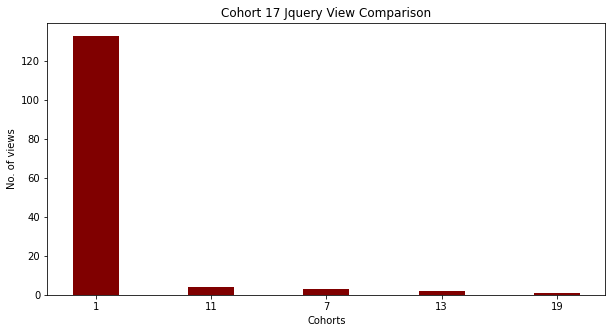

In [122]:
# bar chart comparing jquery 
x = ['1', '11', '7', '13', '19']
y = [133, 4, 3, 2, 1]

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color ='maroon', width = 0.4)
 
plt.xlabel("Cohorts")
plt.ylabel("No. of views")
plt.title("Cohort 17 Jquery View Comparison")
plt.show()

COHORT 17 comparison

In [87]:
match_finder(cohort_17_most, cohort_14_least)

no match


In [88]:
match_finder(cohort_17_most, cohort_1_least)

no match


In [89]:
match_finder(cohort_17_most, cohort_13_least)

jquery
java-i/methods
javascript-i/introduction/working-with-data-types-operators-and-variables
javascript-i/javascript-with-html
no match


In [90]:
match_finder(cohort_17_most, cohort_8_least)

no match


In [92]:
match_finder(cohort_17_most, cohort_19_least)

jquery
java-i/methods
javascript-i/introduction/working-with-data-types-operators-and-variables
javascript-i/javascript-with-html
no match


In [93]:
match_finder(cohort_17_most, cohort_7_least)

jquery
javascript-i/bom-and-dom/bom
no match


In [94]:
match_finder(cohort_17_most, cohort_12_least)

javascript-i
java-i
java-i/methods
html-css
java-i/console-io
no match


In [95]:
match_finder(cohort_17_most, cohort_11_least)

java-i
jquery
javascript-i/introduction/working-with-data-types-operators-and-variables
javascript-i/javascript-with-html
javascript-i/bom-and-dom/bom
no match


cohort 1 looked at jquery and java-1/methods much more than cohorts 13, 19, 7, and 12.

In [99]:
program_1[program_1['cohort_id'] == 17.0].path.value_counts().head(10)

/                                                                            249
javascript-i                                                                 128
java-i                                                                        76
jquery                                                                        71
java-i/methods                                                                69
html-css                                                                      69
javascript-i/introduction/working-with-data-types-operators-and-variables     65
javascript-i/javascript-with-html                                             63
javascript-i/bom-and-dom/bom                                                  60
java-i/console-io                                                             60
Name: path, dtype: int64

In [114]:
(program_1[program_1['cohort_id'] == 13.0].path.value_counts().index == 'java-i/methods')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [120]:
program_1[program_1['cohort_id'] == 7.0].path.value_counts().jquery

3

In [121]:
program_1[program_1['cohort_id'] == 12.0].path.value_counts()[(program_1[program_1['cohort_id'] == 12.0].path.value_counts().index == 'java-i/methods')]

java-i/methods    1
Name: path, dtype: int64

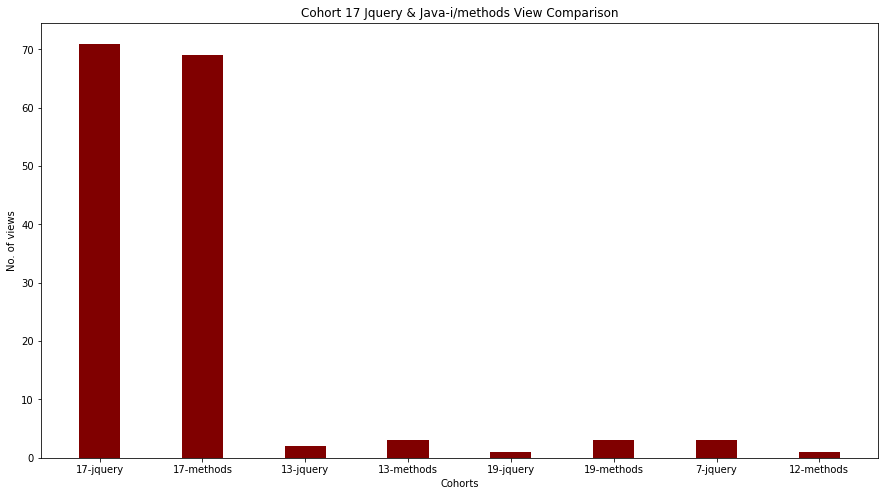

In [130]:
# bar chart comparing cohort 17 and others 
x = ['17-jquery', '17-methods', '13-jquery', '13-methods', '19-jquery', '19-methods', '7-jquery', '12-methods']
y = [71, 69, 2, 3, 1, 3, 3, 1]

fig = plt.figure(figsize = (15, 8))
plt.bar(x, y, color ='maroon', width = 0.4)
 
plt.xlabel("Cohorts")
plt.ylabel("No. of views")
plt.title("Cohort 17 Jquery & Java-i/methods View Comparison")
plt.show()

COHORT 13 comparison

In [131]:
match_finder(cohort_13_most, cohort_14_least)

content/php_iii
content/laravel/quickstart/db-migrations.html
no match


In [132]:
match_finder(cohort_13_most, cohort_1_least)

index.html
content/php_iv
content/php_ii
no match


In [133]:
match_finder(cohort_13_most, cohort_17_least)

content/laravel/quickstart/db-migrations.html
no match


In [134]:
match_finder(cohort_13_most, cohort_8_least)

no match


In [135]:
match_finder(cohort_13_most, cohort_19_least)

no match


In [136]:
match_finder(cohort_13_most, cohort_7_least)

content/laravel/intro
content/laravel/intro/application-structure.html
content/laravel/intro/gitbook/images/favicon.ico
content/php_iii
content/php_iv
content/php_ii
no match


In [137]:
match_finder(cohort_13_most, cohort_12_least)

content/laravel/intro
content/laravel/intro/application-structure.html
content/php_iii
content/php_ii
no match


In [138]:
match_finder(cohort_13_most, cohort_11_least)

content/laravel/intro
content/laravel/intro/application-structure.html
content/laravel/intro/gitbook/images/favicon.ico
content/php_iii
content/php_iv
content/php_ii
no match


In [177]:
program_1[program_1['cohort_id'] == 13.0].path.value_counts().head(10)

/                                                   219
index.html                                           84
content/laravel/intro                                83
content/laravel/intro/application-structure.html     63
content/laravel/intro/gitbook/images/favicon.ico     56
content/php_iii                                      47
content/html-css                                     45
content/php_iv                                       42
content/php_ii                                       40
content/laravel/quickstart/db-migrations.html        40
Name: path, dtype: int64

COHORT 8 comparison

In [139]:
match_finder(cohort_8_most, cohort_14_least)

no match


In [140]:
match_finder(cohort_8_most, cohort_1_least)

no match


In [141]:
match_finder(cohort_8_most, cohort_17_least)

no match


In [142]:
match_finder(cohort_8_most, cohort_13_least)

no match


In [143]:
match_finder(cohort_8_most, cohort_19_least)

no match


In [145]:
match_finder(cohort_8_most, cohort_7_least)

no match


In [146]:
match_finder(cohort_8_most, cohort_12_least)

no match


In [147]:
match_finder(cohort_8_most, cohort_11_least)

no match


Match finder did not find any qualifying paths.

COHORT 19 comparison

In [158]:
program_1[program_1['cohort_id'] == 19.0].path.value_counts().head(10)

/                                                   151
content/laravel/intro                                38
content/html-css                                     33
content/laravel/intro/environment.html               31
content/laravel/intro/application-structure.html     20
content/php_iii                                      19
content/mysql/intro-to-mysql                         19
javascript-i/conditionals                            16
content/php_iii/php-with-html                        15
java-i                                               14
Name: path, dtype: int64

None of these were looked at a significant number of times, therefore I will not include any to display for this cohort.

COHORT 7 comparison

In [169]:
program_1[program_1['cohort_id'] == 7.0].path.value_counts().head(10)

/                                                                            51
content/html-css                                                             29
javascript-i/introduction/working-with-data-types-operators-and-variables    24
html-css                                                                     21
javascript-i/functions                                                       20
content/html-css/introduction.html                                           20
javascript-i/introduction/variables                                          19
javascript-i/introduction/operators                                          18
javascript-i/conditionals                                                    16
javascript-i/javascript-with-html                                            14
Name: path, dtype: int64

None of these were looked at a significant number of times, therefore I will not include any to display for this cohort.

COHORT 12 comparison

In [170]:
program_1[program_1['cohort_id'] == 12.0].path.value_counts().head(10)

content/html-css                           19
content/html-css/introduction.html         14
content/javascript                         12
content/mysql/intro-to-mysql               10
content/html-css/elements.html              9
/                                           8
index.html                                  8
content/html-css/forms.html                 7
content/php_iv                              7
content/javascript/primitive-types.html     7
Name: path, dtype: int64

None of these were looked at a significant number of times, therefore I will not include any to display for this cohort.

COHORT 11 comparison

In [171]:
program_1[program_1['cohort_id'] == 11.0].path.value_counts().head(10)

/                        19
html-css                 12
html-css/elements        11
html-css/introduction    10
content/html-css          9
html-css/forms            8
javascript-i              7
index.html                6
toc                       6
html-css/css-i            6
Name: path, dtype: int64

None of these were looked at a significant number of times, therefore I will not include any to display for this cohort.

### Program 2 (Full Stack Java)

In [173]:
program_2 = df[df['program_id'] == 2.0]
program_2.head(3)

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java
2018-01-26,2018-01-26,09:56:41,97.105.19.61,javascript-i/loops,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java
2018-01-26,2018-01-26,09:56:46,97.105.19.61,javascript-i/conditionals,3,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java


In [181]:
program_2.cohort_id.value_counts().index.sort_values()

Float64Index([ 15.0,  16.0,  18.0,  21.0,  22.0,  23.0,  24.0,  25.0,  26.0,
               27.0,  28.0,  29.0,  31.0,  32.0,  33.0,  51.0,  52.0,  53.0,
               56.0,  57.0,  58.0,  61.0,  62.0, 132.0, 134.0, 135.0, 138.0,
              139.0],
             dtype='float64')

In [245]:
# creates least viewed paths for the whole program
program_2_least = list(program_2.path.value_counts()[program_2.path.value_counts() <= 5].index)

Instead of comparing the each cohort's most-viewed path with each cohort's least-viewed path, 
I will compare each cohort's most-viewed paths with the overall program's least-viewed paths.

This will save time and still provide a valid answer, if found.

I will do this with program 3 as well.

In [246]:
program_2_least

['6-regression/project',
 'python/working-with-files',
 'regression/multivariate-regression-in-excel',
 '7-classification/confusion-matrix',
 '6-regression/5-evaluate',
 'passwords',
 'advanced-topics/virtual-environments',
 '7-clustering/2-about',
 'control-statements-and-loops',
 '7-clustering/Hospital-Distance-Clusters.jpg',
 'advanced-topics/developing-data-products',
 'extra-challenges/css-practice',
 '2-stats/4.3-sampling',
 'appendix/data-viz-references',
 '6-regression/3-split-and-scale',
 '9-timeseries/5.1-parametric-modeling',
 'appendix/professional-resume',
 '2-stats/4.6-compare-means',
 'appendix/professional-development/virtual-meeting-tips-and-tricks',
 'appendix/git-branching',
 '4-python/8.4.1-pandas-overview',
 '7-clustering/4-explore',
 '2-storytelling/3.5-creating-dashboards',
 'html-css/bootstrap-introduction',
 'html-css/css-i/css-grid-in-practice',
 'darden-python-assessment.html',
 '12.3.5_HTML_Forms',
 '7-clustering/1-overview',
 '11.05_Explore',
 'content/html

In [247]:
# cohort 15
cohort_15_most = list(program_2[program_2['cohort_id'] == 15.0].path.value_counts().index[0:10])

# cohort 16
cohort_16_most = list(program_2[program_2['cohort_id'] == 16.0].path.value_counts().index[0:10])

# cohort 18
cohort_18_most = list(program_2[program_2['cohort_id'] == 18.0].path.value_counts().index[0:10])

# cohort 21
cohort_21_most = list(program_2[program_2['cohort_id'] == 21.0].path.value_counts().index[0:10])

# cohort 22
cohort_22_most = list(program_2[program_2['cohort_id'] == 22.0].path.value_counts().index[0:10])

# cohort 23
cohort_23_most = list(program_2[program_2['cohort_id'] == 23.0].path.value_counts().index[0:10])

# cohort 24
cohort_24_most = list(program_2[program_2['cohort_id'] == 24.0].path.value_counts().index[0:10])

# cohort 25
cohort_25_most = list(program_2[program_2['cohort_id'] == 25.0].path.value_counts().index[0:10])

# cohort 26
cohort_26_most = list(program_2[program_2['cohort_id'] == 26.0].path.value_counts().index[0:10])

# cohort 27
cohort_27_most = list(program_2[program_2['cohort_id'] == 27.0].path.value_counts().index[0:10])

# cohort 28
cohort_28_most = list(program_2[program_2['cohort_id'] == 28.0].path.value_counts().index[0:10])

# cohort 29
cohort_29_most = list(program_2[program_2['cohort_id'] == 29.0].path.value_counts().index[0:10])

# cohort 31
cohort_31_most = list(program_2[program_2['cohort_id'] == 31.0].path.value_counts().index[0:10])

# cohort 32
cohort_32_most = list(program_2[program_2['cohort_id'] == 32.0].path.value_counts().index[0:10])

# cohort 33
cohort_33_most = list(program_2[program_2['cohort_id'] == 33.0].path.value_counts().index[0:10])

# cohort 51
cohort_51_most = list(program_2[program_2['cohort_id'] == 51.0].path.value_counts().index[0:10])

# cohort 52
cohort_52_most = list(program_2[program_2['cohort_id'] == 52.0].path.value_counts().index[0:10])

# cohort 53
cohort_53_most = list(program_2[program_2['cohort_id'] == 53.0].path.value_counts().index[0:10])

# cohort 56
cohort_56_most = list(program_2[program_2['cohort_id'] == 56.0].path.value_counts().index[0:10])

# cohort 57
cohort_57_most = list(program_2[program_2['cohort_id'] == 57.0].path.value_counts().index[0:10])

# cohort 58
cohort_58_most = list(program_2[program_2['cohort_id'] == 58.0].path.value_counts().index[0:10])

# cohort 61
cohort_61_most = list(program_2[program_2['cohort_id'] == 61.0].path.value_counts().index[0:10])

# cohort 62
cohort_62_most = list(program_2[program_2['cohort_id'] == 62.0].path.value_counts().index[0:10])

# cohort 132
cohort_132_most = list(program_2[program_2['cohort_id'] == 132.0].path.value_counts().index[0:10])

# cohort 134
cohort_134_most = list(program_2[program_2['cohort_id'] == 134.0].path.value_counts().index[0:10])

# cohort 135
cohort_135_most = list(program_2[program_2['cohort_id'] == 135.0].path.value_counts().index[0:10])

# cohort 138
cohort_138_most = list(program_2[program_2['cohort_id'] == 138.0].path.value_counts().index[0:10])

# cohort 139
cohort_139_most = list(program_2[program_2['cohort_id'] == 139.0].path.value_counts().index[0:10])

In [248]:
match_finder(cohort_15_most, program_2_least)

no match


In [249]:
match_finder(cohort_16_most, program_2_least)

no match


In [250]:
match_finder(cohort_18_most, program_2_least)

no match


In [251]:
match_finder(cohort_21_most, program_2_least)

no match


In [252]:
match_finder(cohort_22_most, program_2_least)

no match


In [253]:
match_finder(cohort_23_most, program_2_least)

no match


In [254]:
match_finder(cohort_24_most, program_2_least)

no match


In [255]:
match_finder(cohort_25_most, program_2_least)

no match


In [256]:
match_finder(cohort_26_most, program_2_least)

no match


In [257]:
match_finder(cohort_27_most, program_2_least)

no match


In [258]:
match_finder(cohort_28_most, program_2_least)

no match


In [259]:
match_finder(cohort_29_most, program_2_least)

no match


In [260]:
match_finder(cohort_31_most, program_2_least)

no match


In [261]:
match_finder(cohort_32_most, program_2_least)

no match


In [262]:
match_finder(cohort_33_most, program_2_least)

no match


In [263]:
match_finder(cohort_51_most, program_2_least)

no match


In [264]:
match_finder(cohort_52_most, program_2_least)

no match


In [265]:
match_finder(cohort_53_most, program_2_least)

no match


In [266]:
match_finder(cohort_56_most, program_2_least)

no match


In [267]:
match_finder(cohort_57_most, program_2_least)

no match


In [268]:
match_finder(cohort_58_most, program_2_least)

no match


In [269]:
match_finder(cohort_61_most, program_2_least)

no match


In [270]:
match_finder(cohort_62_most, program_2_least)

no match


In [271]:
match_finder(cohort_132_most, program_2_least)

no match


In [272]:
match_finder(cohort_134_most, program_2_least)

no match


In [273]:
match_finder(cohort_135_most, program_2_least)

no match


In [274]:
match_finder(cohort_138_most, program_2_least)

no match


In [275]:
match_finder(cohort_139_most, program_2_least)

no match


### Program 2 takeaway
None of the cohorts looked at a lesson signifcantly more that another cohort just glanced at.

### Program 3 (Data Science)

In [217]:
program_3 = df[df['program_id'] == 3.0]
program_3.head(3)

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2019-08-20,2019-08-20,09:39:58,97.105.19.58,/,466,34.0,Bayes,#,2019-08-19,2020-01-30,3,Data Science
2019-08-20,2019-08-20,09:39:59,97.105.19.58,/,467,34.0,Bayes,#,2019-08-19,2020-01-30,3,Data Science
2019-08-20,2019-08-20,09:39:59,97.105.19.58,/,468,34.0,Bayes,#,2019-08-19,2020-01-30,3,Data Science


In [218]:
program_3.cohort_id.value_counts().index.sort_values()

Float64Index([34.0, 55.0, 59.0, 133.0, 137.0], dtype='float64')

In [237]:
program_3_least = list(program_3.path.value_counts()[program_3.path.value_counts() <= 5].index)

In [238]:
program_3_least

['python/objects',
 '7-classification/6.5-svm',
 '1.2-data-science-pipeline',
 'html-css/introduction',
 '6-regression/exercises',
 'clustering/I_have_clusters_now_what',
 'distributed-ml/read-jdbc',
 'nlp/pos-tagging',
 '12-distributed-ml/exercises',
 '7-classification/3-acquire',
 'model',
 'stats/probability-and-event-interactions',
 '6-regression/3.1-acquire-and-prep',
 '1-fundamentals/2.3-visualization.md',
 'mysql-introduction',
 'Hospital-Distance-Clusters.jpg',
 'prepare',
 '7-classification/ensemble',
 'appendix/open_data/www.opensecrets.org',
 'functions',
 '1.3-pipeline-demo',
 'jquery',
 '1-fundamentals/2.3-visualization',
 'scale_features_or_not.svg',
 'bayes-python-assessment-4586.html',
 'classification/handling-missing-values',
 '10-anomaly-detection/3-detecting-timeseries-anomalies',
 'python/matplotlib-styles',
 'Pipeline_Demo',
 '5-stats/confusion-matrix',
 'python/type-annotations',
 'find_me_curie!(12.3.19)',
 '8-clustering/Zillow_Example',
 '9-timeseries/5.1-param

In [230]:
# cohort 34
cohort_34_most = list(program_3[program_3['cohort_id'] == 34.0].path.value_counts().index[0:10])

# cohort 55
cohort_55_most = list(program_3[program_3['cohort_id'] == 55.0].path.value_counts().index[0:10])

# cohort 59
cohort_59_most = list(program_3[program_3['cohort_id'] == 59.0].path.value_counts().index[0:10])

# cohort 133
cohort_133_most = list(program_3[program_3['cohort_id'] == 133.0].path.value_counts().index[0:10])

# cohort 137
cohort_137_most = list(program_3[program_3['cohort_id'] == 137.0].path.value_counts().index[0:10])

In [239]:
match_finder(cohort_34_most, program_3_least)

no match


In [240]:
match_finder(cohort_55_most, program_3_least)

no match


In [241]:
match_finder(cohort_59_most, program_3_least)

no match


In [242]:
match_finder(cohort_133_most, program_3_least)

no match


In [243]:
match_finder(cohort_137_most, program_3_least)

no match


### Program 3 takeaway
None of the cohorts looked at a lesson signifcantly more that another cohort just glanced at.